In [14]:
# All imports needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures 

### Dataset Visualizations

Dataset used: [Metro dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

##### Features:
* holiday: US National Holiday + Minnesota State Holiday
* temp: average Temperature in Kelvin
* rain_1h: mm or Rain
* snow_1h: mm of Snow
* clouds_all: percentage of cloud cover
* weather_main: short text descr. of weather
* weather_description: longer text descr. of weather
* date_time: datetime
* traffic_volume: westbound Traffic Volume (Ground Truth)

In [15]:
# Read data from file
df = pd.read_csv("../data/metro/metro.csv") 
original_data = df.copy()

#### Modeling:

In [16]:
def polynomial_regression(X_train, X_test, y_train, degree = 2):
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(x_poly, y_train)
    
    y_pred = model.predict(poly.fit_transform(X_test))
    return y_pred

def plot_scatter(y_test, y_pred):
    # Plot outputs
    plt.scatter(y_test, y_pred)

    plt.xticks(())
    plt.yticks(())

    plt.show()
    
def print_performance(y_test, y_pred):
    # Mean Squared Error
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    
    print("RMSE: ", metrics.mean_squared_error(y_test,y_pred, squared=False))
    
    # R2 is between 0 and 100 percent
    # 0 indicates that the model explains none of the variability of the response data around its mean.
    # 100 indicates that the model explains all the variability of the response data around its mean.
    print("R2: ", metrics.r2_score(y_test,y_pred) * 100)

In [17]:
# setting parameters for testing
# regression models
alpha = [0.1,0.9,1,2,4]
normalize = [True, False]
degrees = [2,3]

# knn
n_neighbour = [2, 5, 8, 12] 
weights = ['uniform', 'distance']

# trees
tree_max_depth = [6, 9, 12, 15]
tree_min_split = [3, 6, 9, 12]
forest_n_estimators = [10, 50, 75]
forest_max_depth = [6, 9, 12, 15, 20]
forest_min_split = [2, 5] 

#### Linear Models:

Linear Regression
MSE:  3278265.9949783664
RMSE:  1810.5982422885443
R2:  15.813854470960287


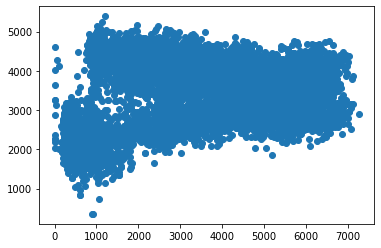

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('traffic_volume', axis=1),df['traffic_volume'], test_size=0.2, random_state=44)

# preprocessing with scaler
# scaler = RobustScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
print('Linear Regression')
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print_performance(y_test, y_pred)

# Lasso Regression
print('\nLasso Regression')
grid = GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': alpha,
                        'normalize':normalize})
# grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(X_test)
print_performance(y_test, y_pred)

# Ridge Regression
print('\nRidge Regression')
grid = GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': alpha,
                        'normalize':normalize})
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(X_test)
print_performance(y_test, y_pred)

# Polynomial Regression
print('\nPolynomial Regression Degree 2')
y_pred2 = polynomial_regression(X_train, X_test, y_train)
print_performance(y_test, y_pred2)
print('\nPolynomial Regression Degree 3')
y_pred3 = polynomial_regression(X_train, X_test, y_train, 3)
print_performance(y_test, y_pred3)

#### Non-parametric Model:

In [19]:
# knn regression
print('KNN')
grid = GridSearchCV(estimator=neighbors.KNeighborsRegressor(),
             param_grid={'n_neighbors': n_neighbour,
                        'weights': weights})
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(X_test)
print_performance(y_test, y_pred)

KNN
{'n_neighbors': 12, 'weights': 'distance'}
MSE:  253288.11300433025
RMSE:  503.27737183816464
R2:  93.49554002792286


#### Tree Models:

In [20]:
# regression tree
print('Regression Tree')
grid = GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': tree_max_depth,
                        'min_samples_leaf': tree_min_split})
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(X_test)
print_performance(y_test, y_pred)

# random forest
print('\nRandom Forest')
grid = GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': forest_n_estimators,
                         'max_depth': forest_max_depth,
                         'min_samples_leaf': forest_min_split})
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(X_test)
print_performance(y_test, y_pred)

Regression Tree
{'max_depth': 12, 'min_samples_leaf': 12}
MSE:  267426.4972364605
RMSE:  517.132958953943
R2:  93.13246513578939

Random Forest
{'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 75}
MSE:  234642.6626522397
RMSE:  484.3992801937671
R2:  93.9743567557906


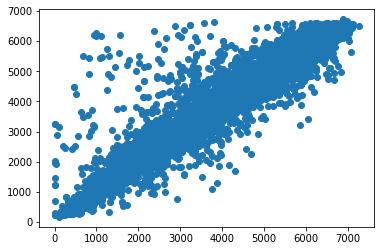

In [33]:
df['traffic_volume'].max()
plt.scatter(y_test, y_pred)